In [1]:
import pandas as pd
import numpy as np

Loading the DataSet into the system using Pandas

In [2]:
data_clean = pd.read_csv('Clean_Dataset.csv')
data_clean.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
data_clean.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [4]:
print(f"The number of Features here is {data_clean.shape[1]} and number of records is {data_clean.shape[0]}")

The number of Features here is 12 and number of records is 300153


In [5]:
print("The stucture of the data set is \n")
data_clean.info()

The stucture of the data set is 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
print("The summary of the DataSet is \n")
data_clean.describe()

The summary of the DataSet is 



,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


Checking For Null Values

In [7]:
data_clean.isnull().sum()

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


Checking for Unique and value count in Categorical Cols

In [8]:
categorical_cols = ['airline', 'flight', 'source_city', 'departure_time',
                    'stops', 'arrival_time', 'destination_city', 'class']

for col in categorical_cols:
    print(f"\n{col}:\n", data_clean[col].value_counts())



airline:
 airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

flight:
 flight
UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
6E-2914       1
G8-107        1
SG-9974       1
6E-865        1
SG-8339       1
Name: count, Length: 1561, dtype: int64

source_city:
 source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

departure_time:
 departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

stops:
 stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

arrival_time:
 arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morn

Data Visualization to get some Insights

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

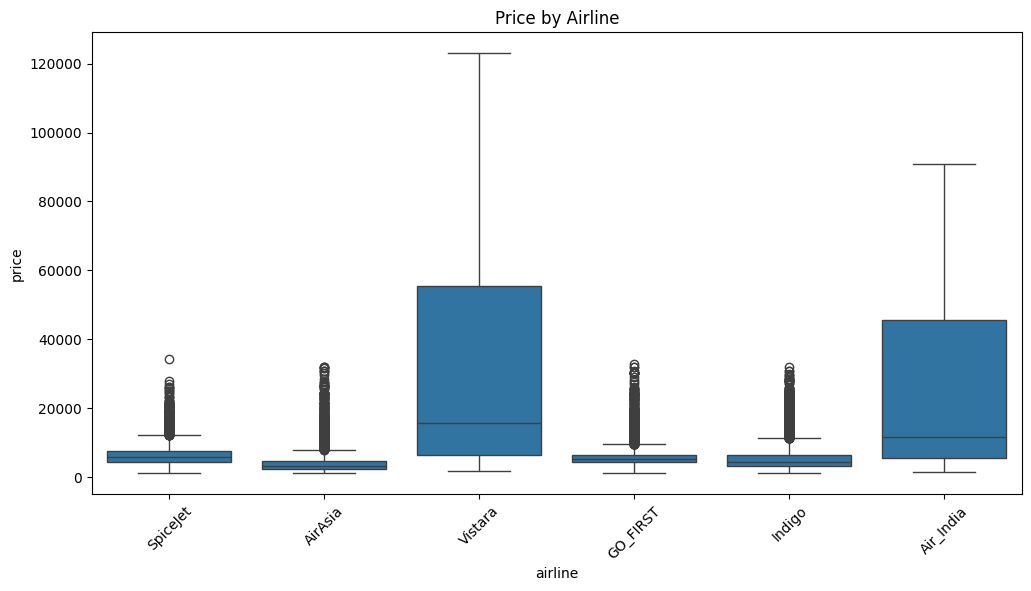

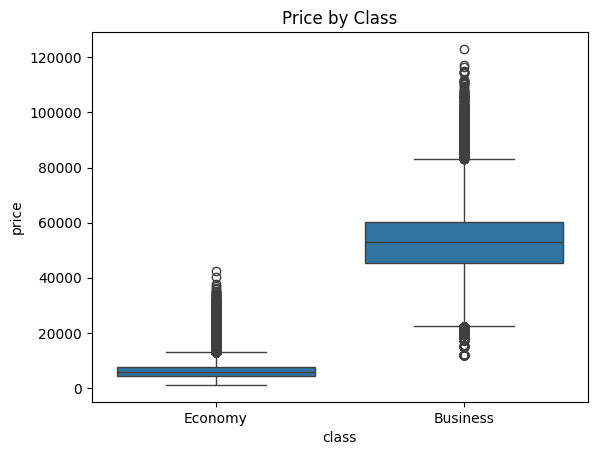

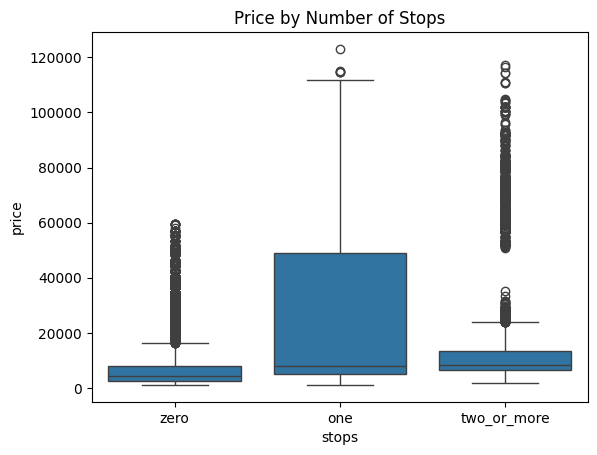

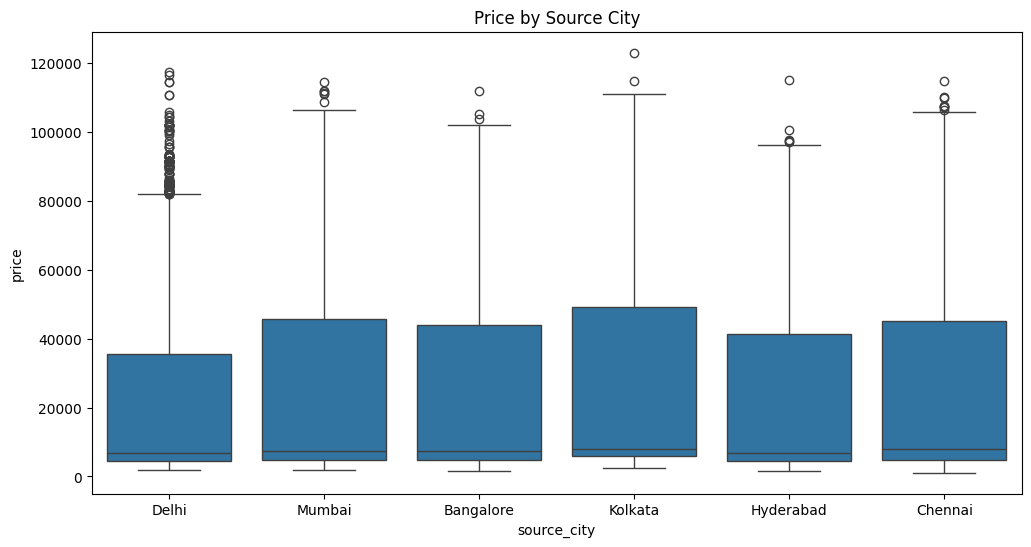

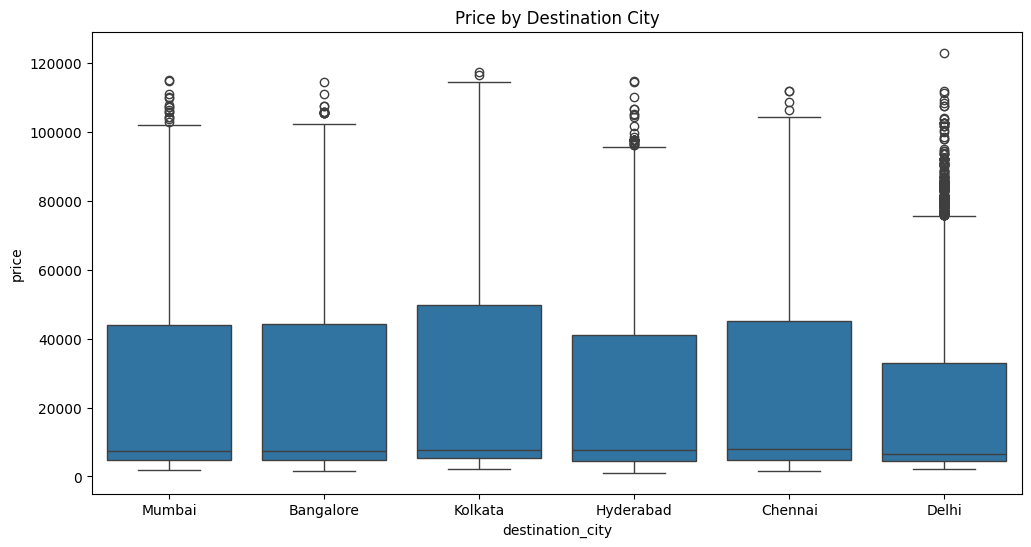

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(x='airline', y='price', data=data_clean)
plt.xticks(rotation=45)
plt.title("Price by Airline")
plt.show()

sns.boxplot(x='class', y='price', data=data_clean)
plt.title("Price by Class")
plt.show()

sns.boxplot(x='stops', y='price', data=data_clean)
plt.title("Price by Number of Stops")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='source_city', y='price', data=data_clean)
plt.title("Price by Source City")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='destination_city', y='price', data=data_clean)
plt.title("Price by Destination City")
plt.show()


Now we have two datasets :

1.) One having the outliers :- this will be trained using XGboost or Random Forest

2.) Second one :- where we will either remove or handle the outliers then train it using Linear Regression

In [11]:
data_clean_no_outliers = data_clean.copy()


In [12]:
data_clean_no_outliers.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
Q1 = data_clean_no_outliers['price'].quantile(0.25)
Q3 = data_clean_no_outliers['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only rows within the bounds
data_clean_no_outliers = data_clean_no_outliers[
    (data_clean_no_outliers['price'] >= lower_bound) &
    (data_clean_no_outliers['price'] <= upper_bound)
]


In [14]:
print('Shape of orginal dataset: ', data_clean.shape)
print('Shape of dataset with no outliers : ', data_clean_no_outliers.shape)

Shape of orginal dataset:  (300153, 12)
Shape of dataset with no outliers :  (300030, 12)


Encoding the Categorical Values


>Encoding the Stops Feature

In [15]:
data_clean_no_outliers.stops.value_counts()

,count
stops,
one,250768
zero,36004
two_or_more,13258


In [16]:
stops_mapping={
    'one' : 1,
    'zero' : 0,
    'two_or_more' : 2
}

data_clean_no_outliers['stops'] = data_clean_no_outliers['stops'].map(stops_mapping)

/tmp/ipython-input-2791732862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean_no_outliers['stops'] = data_clean_no_outliers['stops'].map(stops_mapping)


In [17]:
data_clean_no_outliers['stops'].value_counts()

,count
stops,
1,250768
0,36004
2,13258


>Encoding the Class feature

In [18]:
data_clean_no_outliers['class'].value_counts()

,count
class,
Economy,206666
Business,93364


In [19]:
data_clean_no_outliers['class'] = data_clean_no_outliers['class'].map({'Economy':0, 'Business':1})

In [20]:
data_clean_no_outliers['class'].value_counts()

,count
class,
0,206666
1,93364


>Encoding the Airlines Feature

In [21]:
data_clean_no_outliers['airline'].value_counts()

,count
airline,
Vistara,127736
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [22]:
data_clean_no_outliers = pd.get_dummies(data_clean_no_outliers, columns=['airline'], drop_first=True)


In [23]:
data_clean_no_outliers.head(2)

,Unnamed: 0,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara
0,0,SG-8709,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953,False,False,False,True,False
1,1,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953,False,False,False,True,False


>Encoding Departure and Arrival time

In [24]:
data_clean_no_outliers['arrival_time'].value_counts()

,count
arrival_time,
Night,91488
Evening,78279
Morning,62713
Afternoon,38134
Early_Morning,15415
Late_Night,14001


In [25]:
data_clean_no_outliers['departure_time'].value_counts()

,count
departure_time,
Morning,71102
Early_Morning,66767
Evening,65067
Night,48000
Afternoon,47788
Late_Night,1306


In [26]:
time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

data_clean_no_outliers['departure_time'] = data_clean_no_outliers['departure_time'].map(time_mapping)
data_clean_no_outliers['arrival_time'] = data_clean_no_outliers['arrival_time'].map(time_mapping)


In [27]:
data_clean_no_outliers['arrival_time'].value_counts()

,count
arrival_time,
4,91488
3,78279
1,62713
2,38134
0,15415
5,14001


In [28]:
data_clean_no_outliers['departure_time'].value_counts()

,count
departure_time,
1,71102
0,66767
3,65067
4,48000
2,47788
5,1306


Encoding the Source and Destination

In [29]:
data_clean_no_outliers = pd.get_dummies(data_clean_no_outliers, columns=['source_city', 'destination_city'], drop_first=True)

In [30]:
data_clean_no_outliers.columns

Index(['Unnamed: 0', 'flight', 'departure_time', 'stops', 'arrival_time',
       'class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai'],
      dtype='object')

In [31]:
bool_cols = data_clean_no_outliers.select_dtypes(include='bool').columns
data_clean_no_outliers[bool_cols] = data_clean_no_outliers[bool_cols].astype(int)


In [32]:
data_clean_no_outliers.head(1)

,Unnamed: 0,flight,departure_time,stops,arrival_time,class,duration,days_left,price,airline_Air_India,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,0,SG-8709,3,0,4,0,2.17,1,5953,0,...,0,1,0,0,0,0,0,0,0,1


In [33]:
data_clean_no_outliers.drop('flight', axis=1, inplace=True)


In [34]:
data_clean_no_outliers.drop('Unnamed: 0', axis=1, inplace=True)


In [35]:
data_clean_no_outliers.head(1)

,departure_time,stops,arrival_time,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,3,0,4,0,2.17,1,5953,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [36]:
data_clean_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300030 entries, 0 to 300152
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   departure_time              300030 non-null  int64  
 1   stops                       300030 non-null  int64  
 2   arrival_time                300030 non-null  int64  
 3   class                       300030 non-null  int64  
 4   duration                    300030 non-null  float64
 5   days_left                   300030 non-null  int64  
 6   price                       300030 non-null  int64  
 7   airline_Air_India           300030 non-null  int64  
 8   airline_GO_FIRST            300030 non-null  int64  
 9   airline_Indigo              300030 non-null  int64  
 10  airline_SpiceJet            300030 non-null  int64  
 11  airline_Vistara             300030 non-null  int64  
 12  source_city_Chennai         300030 non-null  int64  
 13  source_city_Delhi  

Preparing the Data for training and Testing

In [37]:
from sklearn.model_selection import train_test_split

X = data_clean_no_outliers.drop('price', axis=1)
Y = data_clean_no_outliers['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
print("Shape of Training data is ", X_test.shape)
print("Shape of Testing data is ", X_train.shape)

Shape of Training data is  (60006, 21)
Shape of Testing data is  (240024, 21)


Training the Model using Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)

Y_pred = lr_model.predict(X_test)

In [40]:
lr_model

LinearRegression()

Evaluating the Model

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions already made as Y_pred = lr_model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 4475.95
Root Mean Squared Error (RMSE): 6731.48
R² Score: 0.9112


Static Prediction of the Model

In [42]:
X_test.iloc[:5]

lr_model.predict(X_test.iloc[:5])

# Corrected loop without warnings
for i in range(5):
    row = X_test.iloc[[i]]  # double brackets keep it as DataFrame with column names
    pred = lr_model.predict(row)[0]
    actual = Y_test.iloc[i]
    print(f"Actual: ₹{actual:.2f} | Predicted: ₹{pred:.2f}")

Actual: ₹5042.00 | Predicted: ₹9554.33
Actual: ₹6109.00 | Predicted: ₹7632.06
Actual: ₹5103.00 | Predicted: ₹9477.96
Actual: ₹5087.00 | Predicted: ₹2527.78
Actual: ₹4007.00 | Predicted: ₹4146.06


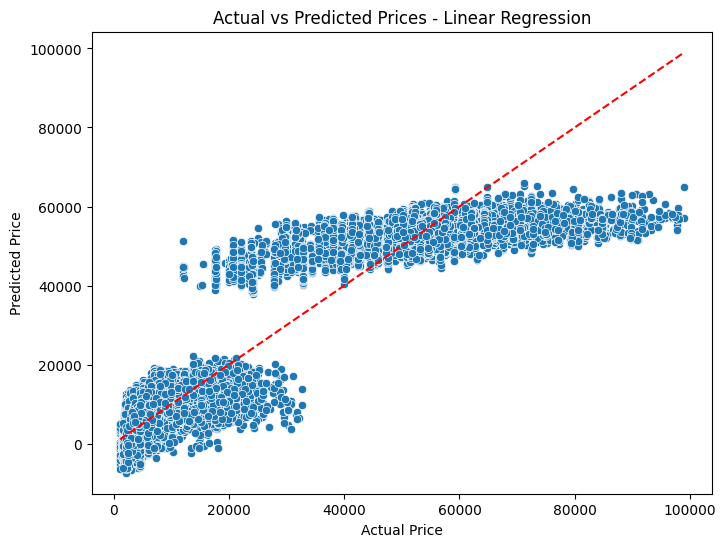

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices - Linear Regression")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.show()


Using Other Models


In [44]:
from sklearn.ensemble import RandomForestRegressor

Y_train = Y_train.clip(upper=50000)
Y_test = Y_test.clip(upper=50000)

Y_train_log = np.log1p(Y_train)
Y_test_log = np.log1p(Y_test)

rfr_model = RandomForestRegressor(random_state=42, n_estimators=80)
rfr_model.fit(X_train, Y_train_log)

Y_pred_rfr_log = rfr_model.predict(X_test)

Y_pred_rfr_log = np.clip(Y_pred_rfr_log, a_min=None, a_max=15)

Y_pred_rfr = np.expm1(Y_pred_rfr_log)

In [45]:
rfr_model

RandomForestRegressor(n_estimators=80, random_state=42)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate
mae_rfr = mean_absolute_error(Y_test, Y_pred_rfr)
rmse_rfr = np.sqrt(mean_squared_error(Y_test, Y_pred_rfr))
r2_rfr = r2_score(Y_test, Y_pred_rfr)

print(f"Mean Absolute Error (MAE): {mae_rfr:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:.2f}")
print(f"R² Score: {r2_rfr:.4f}")



Mean Absolute Error (MAE): 514.22
Root Mean Squared Error (RMSE): 1403.98
R² Score: 0.9945


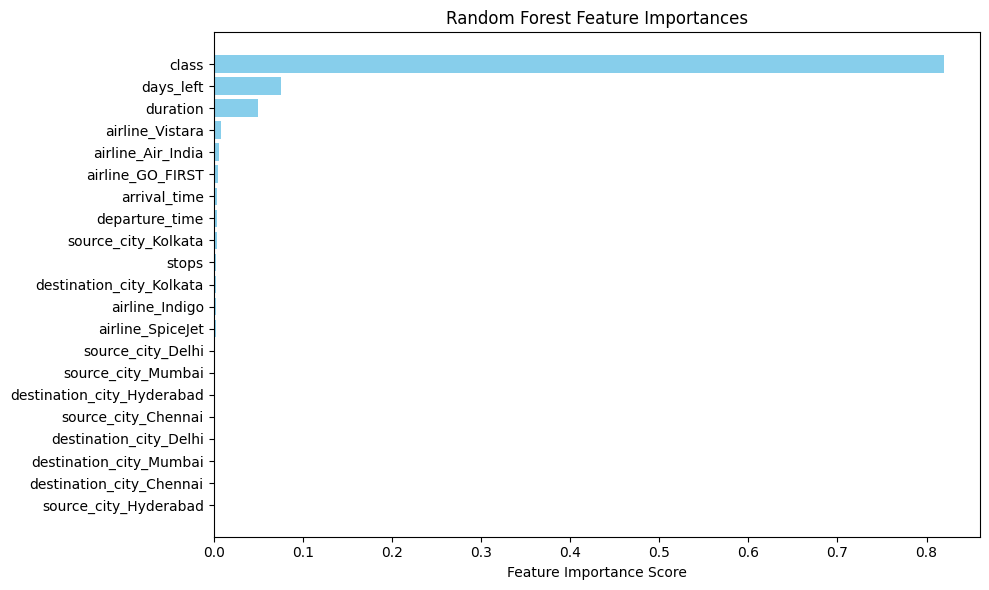

In [47]:

# Get feature importances from the trained model
importances = rfr_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importance_df['Feature'], feat_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


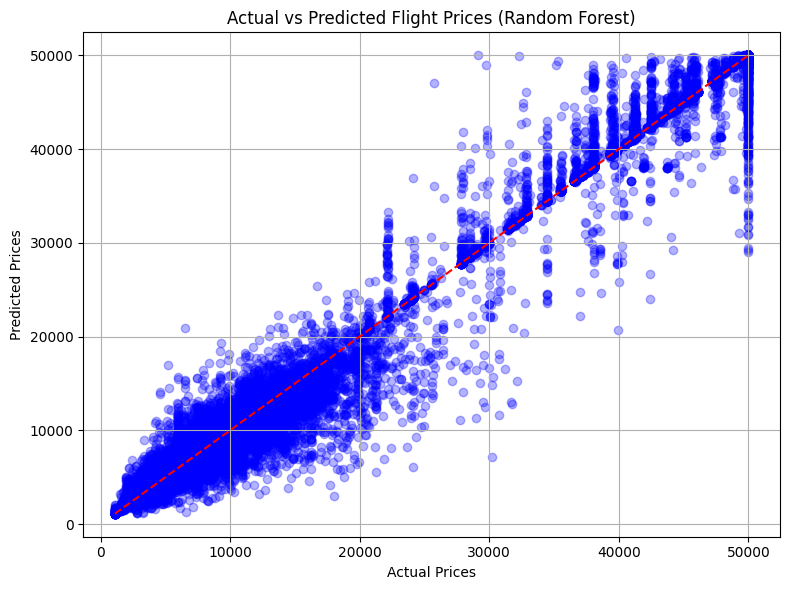

In [48]:


plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_rfr, alpha=0.3, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Reference line
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Flight Prices (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()




Saving the Model as a pkl file

In [49]:
import joblib

In [51]:
joblib.dump(rfr_model, 'rfr_model.joblib', compress=5)
print('The model is saved successfully')

The model is saved successfully


In [52]:
X.columns

Index(['departure_time', 'stops', 'arrival_time', 'class', 'duration',
       'days_left', 'airline_Air_India', 'airline_GO_FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_Vistara', 'source_city_Chennai',
       'source_city_Delhi', 'source_city_Hyderabad', 'source_city_Kolkata',
       'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai'],
      dtype='object')

In [53]:
X.head()

,departure_time,stops,arrival_time,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,3,0,4,0,2.17,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,0,2.33,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,2.17,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,0,2,0,2.25,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,1,0,2.33,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [54]:
X_test.head()

,departure_time,stops,arrival_time,class,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
199729,1,1,3,0,8.50,21,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
139746,3,1,0,0,14.17,31,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
54736,1,1,4,0,8.83,13,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9515,4,1,1,0,10.50,47,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
18040,0,1,2,0,9.08,40,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [55]:
Y_test.head()

,price
199729,5042
139746,6109
54736,5103
9515,5087
18040,4007
